### O problema

O problema se refere aos dados de vinhos portugueses "Vinho Verde", que possuem vvariantes de vinho branco e tinto. Devido a questões de privacidade, apenas variáveis físico-químicas (input) e sensoriais (output) estão disponíveis (por exemplo, não há dados sobre tipo de uva, marca do vinho, preço de venda, etc).

### Objetivo
Criar um modelo para estimar a qualidade do vinho.

### Informação sobre os atributos

#### Variáveis input (baseado em testes físico-químicos):
1. Tipo
2. Acidez fixa
3. Volatilidade da acidez
4. Ácido cítrico
5. Açúcar residual
6. Cloretos
7. Dióxido de enxofre livre
8. Dióxido de enxofre total
9. Densidade
10. pH
11. Sulfatos
12. Álcool

#### Variável output (baseado em dado sensorial):
13. Qualidade (score entre 0 and 10)

#### Resolução
1. Faça uma análise exploratória para avaliar a consistência dos dados e identificar
possíveis variáveis que impactam na qualidade do vinho.

2. Para a realização deste teste você pode utilizar o software de sua preferência (Python ou R), só pedimos que compartilhe conosco o código fonte (utilizando um repositório git). Além disso, inclua um arquivo README.md onde você deve cobrir as respostas para os 5 pontos abaixo:

    a. Como foi a definição da sua estratégia de modelagem?
    
    b. Como foi definida a função de custo utilizada?
    
    c. Qual foi o critério utilizado na seleção do modelo final?
    
    d. Qual foi o critério utilizado para validação do modelo? Por que escolheu utilizar
    este método?
    
    e. Quais evidências você possui de que seu modelo é suficientemente bom?

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
## Leitura do dataset
df=pd.read_csv('winequality.csv',';')

## Explorando o dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null object
quality                 6497 non-null int64
dtypes: float64(10), int64(1), object(2)
memory usage: 659.9+ KB


In [4]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df.tail(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6487,Red,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
6488,Red,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
6489,Red,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
6490,Red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11,6
6491,Red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,Red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,Red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,Red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11,6
6495,Red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,Red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11,6


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,1.710882,3.218501,0.531268,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,7.636088,0.160787,0.148806,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,103.898000,4.010000,2.000000,9.000000


In [7]:
### Existem valores faltantes?

In [8]:
np.sum(df.isnull())

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
#Totais do dataset
df.count()

type                    6497
fixed acidity           6497
volatile acidity        6497
citric acid             6497
residual sugar          6497
chlorides               6497
free sulfur dioxide     6497
total sulfur dioxide    6497
density                 6497
pH                      6497
sulphates               6497
alcohol                 6497
quality                 6497
dtype: int64

### Análise das Váriaveis

Qualitativa Nominal: type

Quantitativa Continua: fixed acidity, volatile acidity, citric acid, 
    residual sugar, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates e alcohol
    
Qualitativa Ordinal: quality

## Consistência dos dados

In [10]:
#Verificar se todos os valores das variaveis continuas são numéricos
df.iloc[0:,1:].apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())


fixed acidity            True
volatile acidity         True
citric acid              True
residual sugar           True
chlorides                True
free sulfur dioxide      True
total sulfur dioxide     True
density                  True
pH                       True
sulphates                True
alcohol                 False
quality                  True
dtype: bool

### O teste anterior mostrou que a coluna Alcohol possui valores não númericos
Abaixo serão mostrados os valores da coluna não são numéricos



In [11]:
##Linhas que nao podem ser convertidas para float na coluna Alcohol
df[~df.alcohol.str.match('^\-?(\d*\.?\d+|\d+\.?\d*)$')].head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4315,White,6.7,0.41,0.24,5.4,0.035,33.0,115.0,0.99010,3.12,0.44,128.933.333.333.333,7
4319,White,6.7,0.41,0.24,5.4,0.035,33.0,115.0,0.99010,3.12,0.44,128.933.333.333.333,7
4323,White,8.4,0.27,0.30,2.2,0.037,36.0,129.0,0.99085,2.89,0.30,114.666.666.666.667,6
4341,White,7.4,0.27,0.52,15.7,0.054,36.0,139.0,0.99788,3.04,0.62,100.333.333.333.333,6
4353,White,7.4,0.16,0.30,1.4,0.064,34.0,166.0,0.99136,3.11,0.42,114.333.333.333.333,6


In [12]:
#guardar os valores que serão excluidos
df_temp_excluir = df[~df.alcohol.str.match('^\-?(\d*\.?\d+|\d+\.?\d*)$')]
df_temp_excluir.count()

type                    40
fixed acidity           40
volatile acidity        40
citric acid             40
residual sugar          40
chlorides               40
free sulfur dioxide     40
total sulfur dioxide    40
density                 40
pH                      40
sulphates               40
alcohol                 40
quality                 40
dtype: int64

In [13]:
#Para tratar esses valores
#1. Vamos criar um novo dataset
#2. vamos criar uma nova coluna no novo dataset chamada excluir, que será um flag para usarmos ou não a linha na predição de qualidade. 
#1 a linha será omitida das análises 
#0 a linha será mantida

df_novo = df.copy()

df_novo['excluir'] = 0

df_novo['excluir'] = np.where(~df_novo.alcohol.str.match('^\-?(\d*\.?\d+|\d+\.?\d*)$'), 1, 0)


In [14]:
df_novo[df_novo['excluir']==1].count()

type                    40
fixed acidity           40
volatile acidity        40
citric acid             40
residual sugar          40
chlorides               40
free sulfur dioxide     40
total sulfur dioxide    40
density                 40
pH                      40
sulphates               40
alcohol                 40
quality                 40
excluir                 40
dtype: int64

In [15]:
#mantendo so as linhas validas
df_novo = df_novo[df_novo['excluir']==0]
df_novo.alcohol =  df_novo.alcohol.astype(float)

In [16]:
df_novo.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
excluir                   int32
dtype: object

In [17]:
df_novo.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,excluir
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [18]:
## substituir o tipo do vinho por 1 ou 0
df_novo.replace({'White': 0, 'Red': 1},inplace = True)

In [19]:
df_novo.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,excluir
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


### Fiz alguns testes e percebi que analisando separado vinho tinto do branco, o modelo acerta mais

# Vinho Tinto

In [20]:
df_novo_red = df_novo[df_novo['type']==1]

In [21]:
df_novo_red.drop('type',axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,excluir
4898,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
4899,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
4900,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
4901,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4902,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
4903,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
4904,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,0
4905,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,0
4906,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,0
4907,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,0


In [22]:
df_novo_red.count()

type                    1593
fixed acidity           1593
volatile acidity        1593
citric acid             1593
residual sugar          1593
chlorides               1593
free sulfur dioxide     1593
total sulfur dioxide    1593
density                 1593
pH                      1593
sulphates               1593
alcohol                 1593
quality                 1593
excluir                 1593
dtype: int64

### Identificando Outliers

In [23]:
'''df_temp = df_novo
Q1 = df_temp.quantile(0.25)
Q3 = df_temp.quantile(0.75)
IQR = Q3 - Q1

#df_temp = df_novo_out.iloc[:,1:-2]
Q1 = df_temp.quantile(0.25)
Q3 = df_temp.quantile(0.75)
IQR = Q3 - Q1

df_novo_out = df_temp[~((df_temp.iloc[:,1:-2] < (Q1 - 1.5 * IQR)) |(df_temp.iloc[:,1:-2] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_novo_out.shape df_novo = df_novo_out'''




'df_temp = df_novo\nQ1 = df_temp.quantile(0.25)\nQ3 = df_temp.quantile(0.75)\nIQR = Q3 - Q1\n\n#df_temp = df_novo_out.iloc[:,1:-2]\nQ1 = df_temp.quantile(0.25)\nQ3 = df_temp.quantile(0.75)\nIQR = Q3 - Q1\n\ndf_novo_out = df_temp[~((df_temp.iloc[:,1:-2] < (Q1 - 1.5 * IQR)) |(df_temp.iloc[:,1:-2] > (Q3 + 1.5 * IQR))).any(axis=1)]\ndf_novo_out.shape df_novo = df_novo_out'

### Verifiquei que o resultado foi melhor com quando não tirei os outliers

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


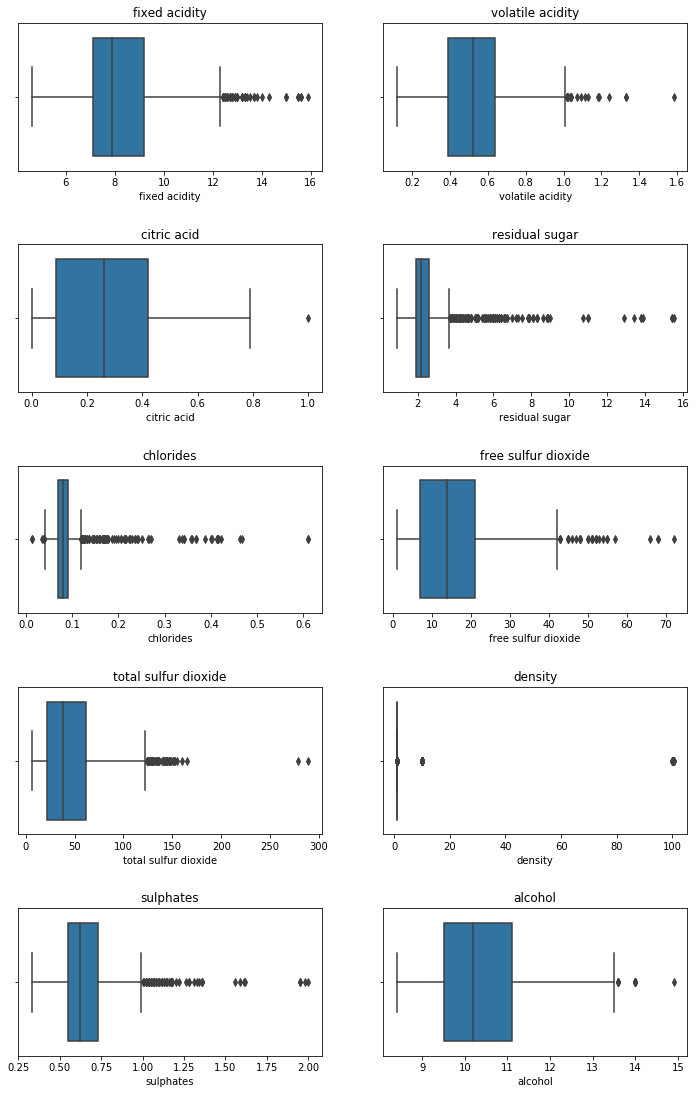

In [24]:
### boxplot dados com outliers
df_plot_ant = df_novo_red.copy()

fig, ax = plt.subplots(nrows=5, ncols=2, sharey=True)

fig.set_size_inches(12, 19)

fig.subplots_adjust(hspace = 0.5)

sns.boxplot(df_plot_ant['fixed acidity'], ax=ax[0,0]).set_title('fixed acidity')

sns.boxplot(df_plot_ant['volatile acidity'], ax=ax[0,1]).set_title('volatile acidity')

sns.boxplot(df_plot_ant['citric acid'], ax=ax[1,0]).set_title('citric acid')

sns.boxplot(df_plot_ant['residual sugar'], ax=ax[1,1]).set_title('residual sugar')

sns.boxplot(df_plot_ant['chlorides'], ax=ax[2,0]).set_title('chlorides')

sns.boxplot(df_plot_ant['free sulfur dioxide'], ax=ax[2,1]).set_title('free sulfur dioxide')

sns.boxplot(df_plot_ant['total sulfur dioxide'], ax=ax[3,0]).set_title('total sulfur dioxide')

sns.boxplot(df_plot_ant['density'], ax=ax[3,1]).set_title('density')

sns.boxplot(df_plot_ant['sulphates'], ax=ax[4,0]).set_title('sulphates')

sns.boxplot(df_plot_ant['alcohol'], ax=ax[4,1]).set_title('alcohol')

fig.show()


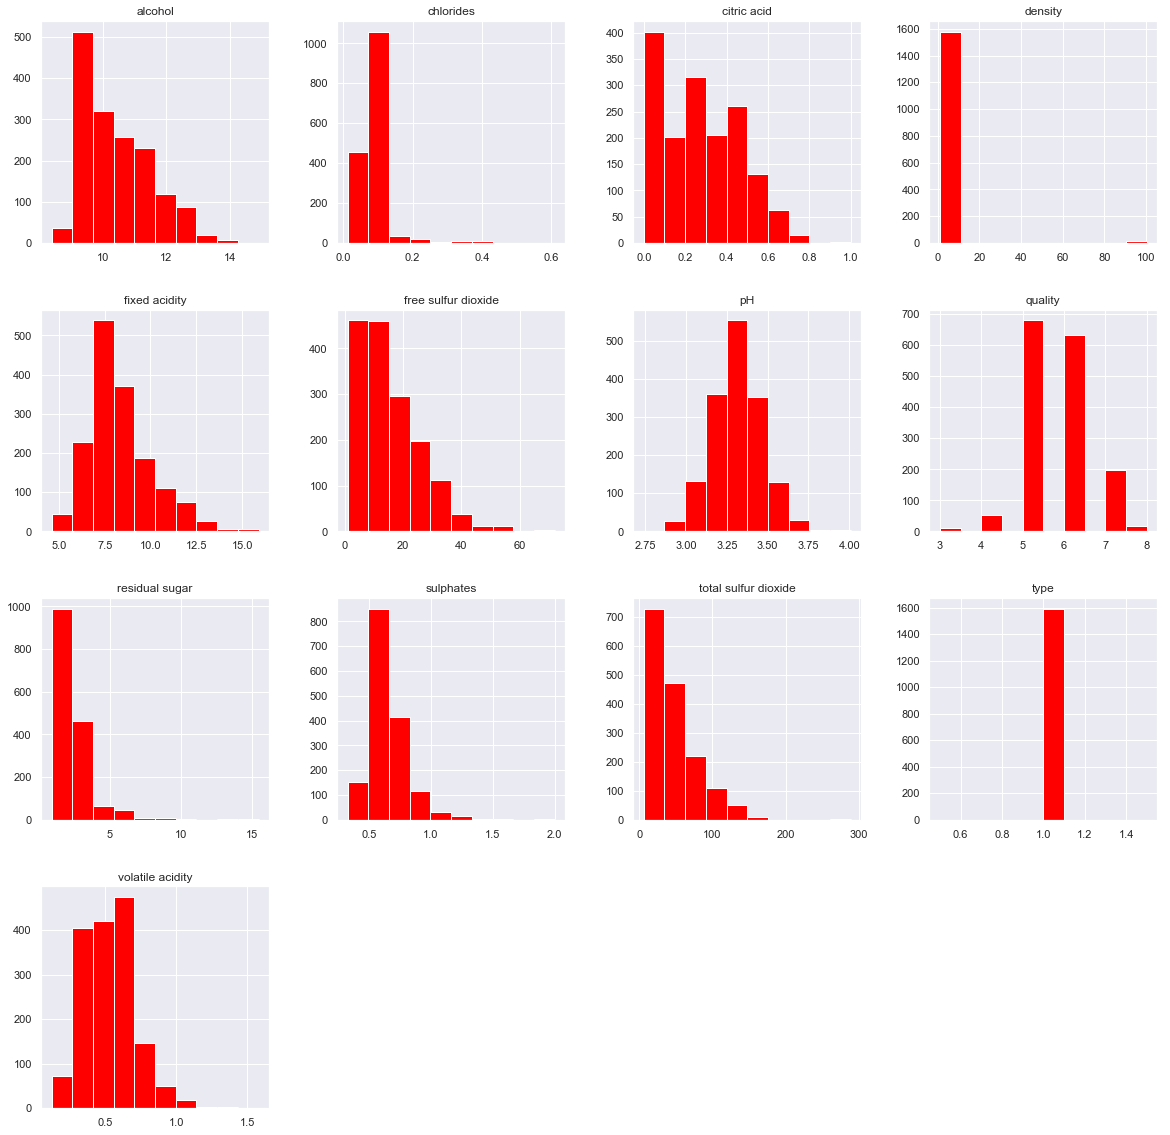

In [25]:
#distribuição dos valores
sns.set()
df_novo_red.iloc[:,:-1].hist(figsize=(20,20), color='red')
plt.show()

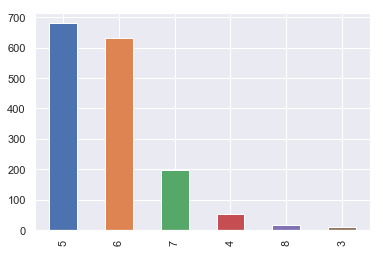

In [26]:
#Estimar qualidade do vinho
#aprendizado supervisionado
#classificação

#contar classes de qualiade existentes
df_novo_red['quality'].value_counts().plot.bar()

df_novo_red = df_novo_red.drop('excluir',axis=1)
df_novo_red = df_novo_red.drop('type',axis=1)

## Correlação das variaveis

In [27]:
correlations = df_novo_red.corr()['quality'].drop(['quality'])


In [28]:
correlations.sort_values(ascending=False)

alcohol                 0.475875
sulphates               0.250633
citric acid             0.227969
fixed acidity           0.125968
residual sugar          0.013706
density                -0.025612
free sulfur dioxide    -0.050756
pH                     -0.058812
chlorides              -0.128119
total sulfur dioxide   -0.187786
volatile acidity       -0.392391
Name: quality, dtype: float64

In [29]:
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from collections import OrderedDict
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier


In [30]:
data = df_novo_red.copy()
y = data.quality
X = data.drop('quality', axis=1)

#Todas as variaveis
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3) # 70% training and 30% test

In [31]:
corrs = OrderedDict([(col, pearsonr(X_train[col], y_train)) for col in X_train.columns])
corrs = pd.DataFrame(index = corrs.keys(), data={
        'corr_coef': [corr[0] for corr in corrs.values()],
        'p_value': [corr[1] for corr in corrs.values()],
    })

In [32]:
corrs.applymap(lambda xx : abs(xx)).sort_values(by='corr_coef', ascending=False).rename(columns={
        'corr_coef': 'absolute correlation coefficient'
    })

,absolute correlation coefficient,p_value
alcohol,0.450719,6.916737e-57
volatile acidity,0.402320,1.250932e-44
sulphates,0.219097,1.383970e-13
citric acid,0.198737,2.148079e-11
total sulfur dioxide,0.160931,6.554725e-08
chlorides,0.148429,6.413588e-07
fixed acidity,0.095232,1.454485e-03
pH,0.047949,1.095527e-01
free sulfur dioxide,0.035148,2.409204e-01
density,0.024283,4.179099e-01


In [33]:
df_novo_red.astype(float).corr().sort_values(by="quality")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
volatile acidity,-0.255523,1.000000,-0.552706,-0.001220,0.061642,-0.011887,0.074111,0.004978,0.235148,-0.261169,-0.201274,-0.392391
total sulfur dioxide,-0.109774,0.074111,0.038429,0.201453,0.048503,0.667734,1.000000,0.038884,-0.068747,0.042538,-0.208832,-0.187786
chlorides,0.092756,0.061642,0.203323,0.055669,1.000000,0.005940,0.048503,0.074338,-0.264661,0.372518,-0.220403,-0.128119
pH,-0.681840,0.235148,-0.542072,-0.087269,-0.264661,0.068944,-0.068747,-0.125459,1.000000,-0.199569,0.204016,-0.058812
free sulfur dioxide,-0.151649,-0.011887,-0.059081,0.186547,0.005940,1.000000,0.667734,0.093834,0.068944,0.051729,-0.070586,-0.050756
density,0.261774,0.004978,0.087695,0.299792,0.074338,0.093834,0.038884,1.000000,-0.125459,0.048355,-0.061061,-0.025612
residual sugar,0.118172,-0.001220,0.145078,1.000000,0.055669,0.186547,0.201453,0.299792,-0.087269,0.006422,0.044204,0.013706
fixed acidity,1.000000,-0.255523,0.671606,0.118172,0.092756,-0.151649,-0.109774,0.261774,-0.681840,0.185312,-0.058633,0.125968
citric acid,0.671606,-0.552706,1.000000,0.145078,0.203323,-0.059081,0.038429,0.087695,-0.542072,0.314043,0.112309,0.227969
sulphates,0.185312,-0.261169,0.314043,0.006422,0.372518,0.051729,0.042538,0.048355,-0.199569,1.000000,0.091346,0.250633


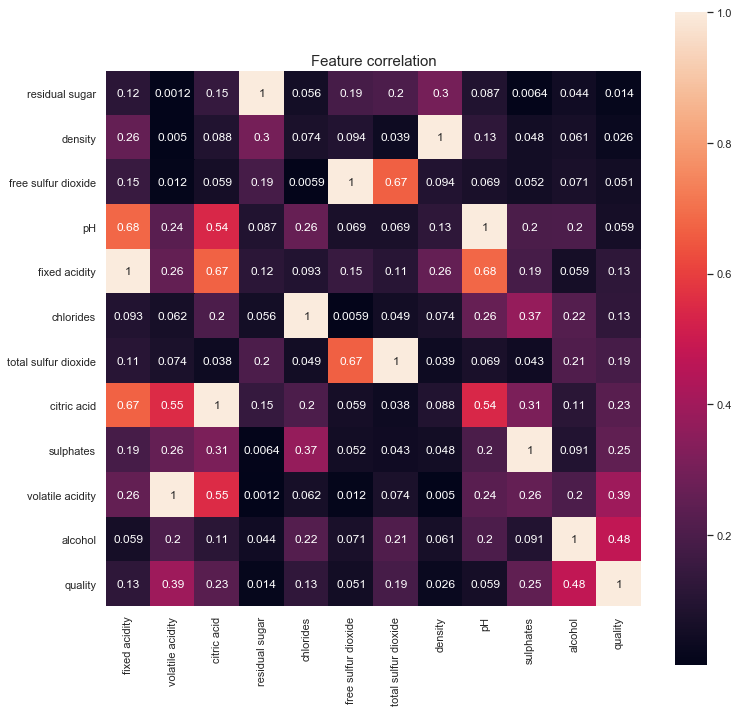

In [34]:
plt.figure(figsize=(12,12))
plt.title('Feature correlation', size=15)
sns.heatmap(df_novo_red.astype(float).corr().abs().sort_values(by="quality"),vmax=1.0, square=True, annot=True)

In [35]:
data = df_novo_red
y = data.quality
X = data.drop('residual sugar', axis=1)
X = data.drop('density', axis=1)
X = data.drop('free sulfur dioxide', axis=1)
X = data.drop('pH', axis=1)
X = data.drop('fixed acidity', axis=1)
X = data.drop('chlorides', axis=1)
X = data.drop('total sulfur dioxide', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)


### KNN Classifier

In [36]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8338557993730408


In [37]:
#converting the numpy array to list
x=np.array(y_pred).tolist()

#printing first 5 predictions
print("\nThe prediction:\n")
for i in range(0,5):
    print(x[i])
    
#printing first five expectations
print("\nThe expectation:\n")
y_test.head()


The prediction:

6
5
6
6
6

The expectation:



6402    6
5113    5
5964    7
5863    6
5444    6
Name: quality, dtype: int64

Accuracy: 83.386%
F1 Score:  0.43144957023084296
Precision Score:  0.5731690118969962
Recall Score:  0.41231962655807863


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


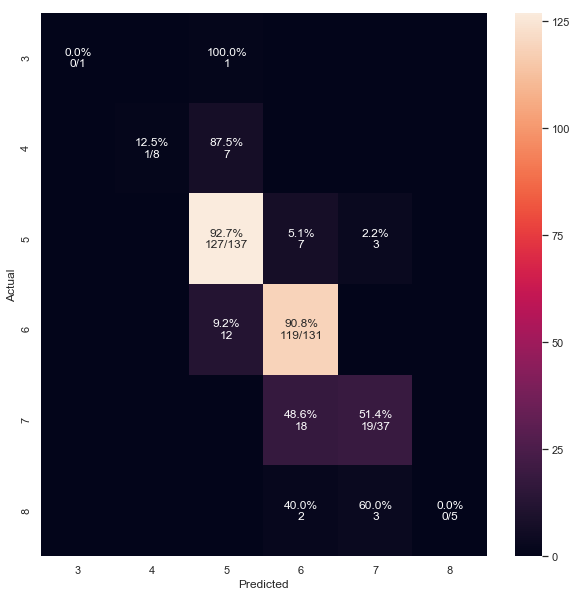

In [38]:
from sklearn import model_selection
test_size = 0.33
seed = 7

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print("Accuracy: %.3f%%" % (result*100.0))
y_pred = model.predict(X_test)
print("F1 Score: ", f1_score(y_test, y_pred, average="macro"))
print("Precision Score: ", precision_score(y_test, y_pred, average="macro"))
print("Recall Score: ", recall_score(y_test, y_pred, average="macro")) 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.show()

cm_analysis(y_test, y_pred, model.classes_, ymap=None, figsize=(10,10))

### Decision Tree

In [39]:
data = df_novo_red
y = data.quality
X = data.drop('density', axis=1)
X = data.drop('pH', axis=1)
X = data.drop('free sulfur dioxide', axis=1)
X = data.drop('fixed acidity', axis=1)
X = data.drop('chlorides', axis=1)
X = data.drop('total sulfur dioxide', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [40]:
X_train_scaled = preprocessing.scale(X_train)
print(X_train_scaled)

[[ 0.28469845 -1.19806595  0.64886044 ...  0.74184191  1.29210226
   1.69592721]
 [-0.23214012 -1.19806595  0.24151917 ... -0.58758453  2.0392432
   0.45133547]
 [ 0.34212495 -2.25176327  0.90344874 ...  0.56843846  1.38549487
   1.69592721]
 ...
 [ 0.45697797 -0.14436863  0.13968385 ...  0.27943271  0.07799823
   0.45133547]
 [-0.8064052  -0.08891088 -0.21673977 ...  1.03084766  0.73174655
   0.45133547]
 [ 0.16984543 -0.03345313  0.54702512 ... -0.81878912 -0.94932056
  -0.79325628]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [41]:
from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.38557993730407525


In [43]:
#converting the numpy array to list
x=np.array(y_pred).tolist()

#printing first 5 predictions
print("\nThe prediction:\n")
for i in range(0,5):
    print(x[i])
    
#printing first five expectations
print("\nThe expectation:\n")
y_test.head()


The prediction:

6
5
6
6
6

The expectation:



6114    6
6393    6
5494    6
5745    6
5662    6
Name: quality, dtype: int64

# Vinho Branco

In [44]:
df_novo_white = df_novo[df_novo['type']==0]
df_novo_white = df_novo_white.drop('type',axis=1)
df_novo_white = df_novo_white.drop('excluir',axis=1)
df_novo_white.count()



fixed acidity           4864
volatile acidity        4864
citric acid             4864
residual sugar          4864
chlorides               4864
free sulfur dioxide     4864
total sulfur dioxide    4864
density                 4864
pH                      4864
sulphates               4864
alcohol                 4864
quality                 4864
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


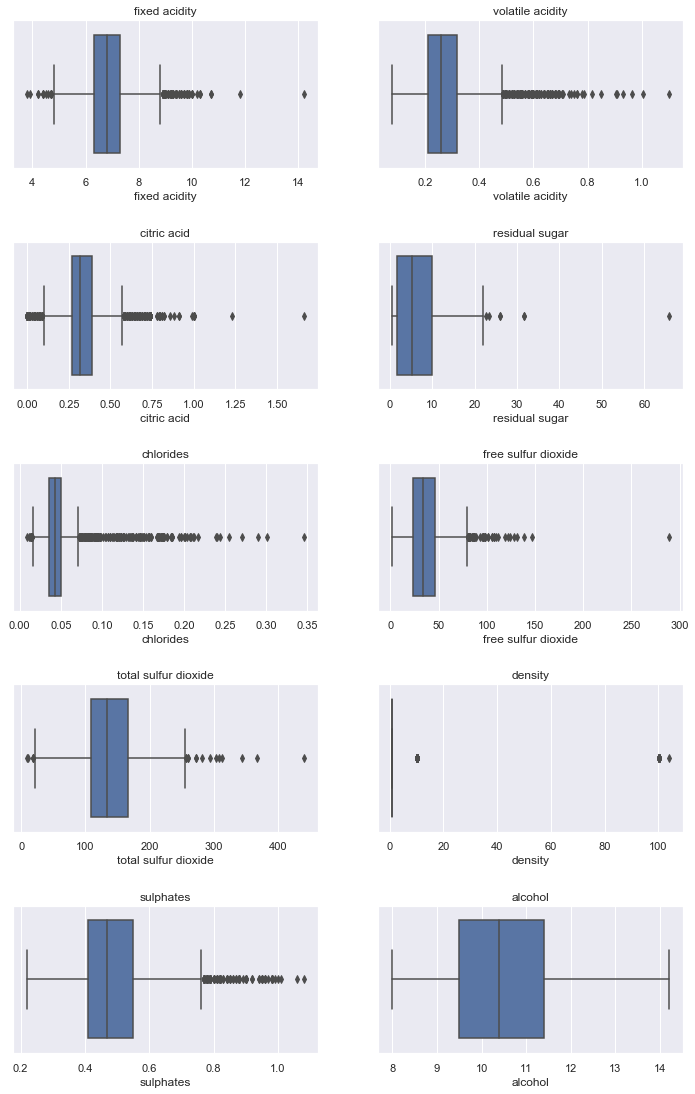

In [45]:
### boxplot dados com outliers
df_plot_ant = df_novo_white.copy()

fig, ax = plt.subplots(nrows=5, ncols=2, sharey=True)

fig.set_size_inches(12, 19)

fig.subplots_adjust(hspace = 0.5)

sns.boxplot(df_plot_ant['fixed acidity'], ax=ax[0,0]).set_title('fixed acidity')

sns.boxplot(df_plot_ant['volatile acidity'], ax=ax[0,1]).set_title('volatile acidity')

sns.boxplot(df_plot_ant['citric acid'], ax=ax[1,0]).set_title('citric acid')

sns.boxplot(df_plot_ant['residual sugar'], ax=ax[1,1]).set_title('residual sugar')

sns.boxplot(df_plot_ant['chlorides'], ax=ax[2,0]).set_title('chlorides')

sns.boxplot(df_plot_ant['free sulfur dioxide'], ax=ax[2,1]).set_title('free sulfur dioxide')

sns.boxplot(df_plot_ant['total sulfur dioxide'], ax=ax[3,0]).set_title('total sulfur dioxide')

sns.boxplot(df_plot_ant['density'], ax=ax[3,1]).set_title('density')

sns.boxplot(df_plot_ant['sulphates'], ax=ax[4,0]).set_title('sulphates')

sns.boxplot(df_plot_ant['alcohol'], ax=ax[4,1]).set_title('alcohol')

fig.show()



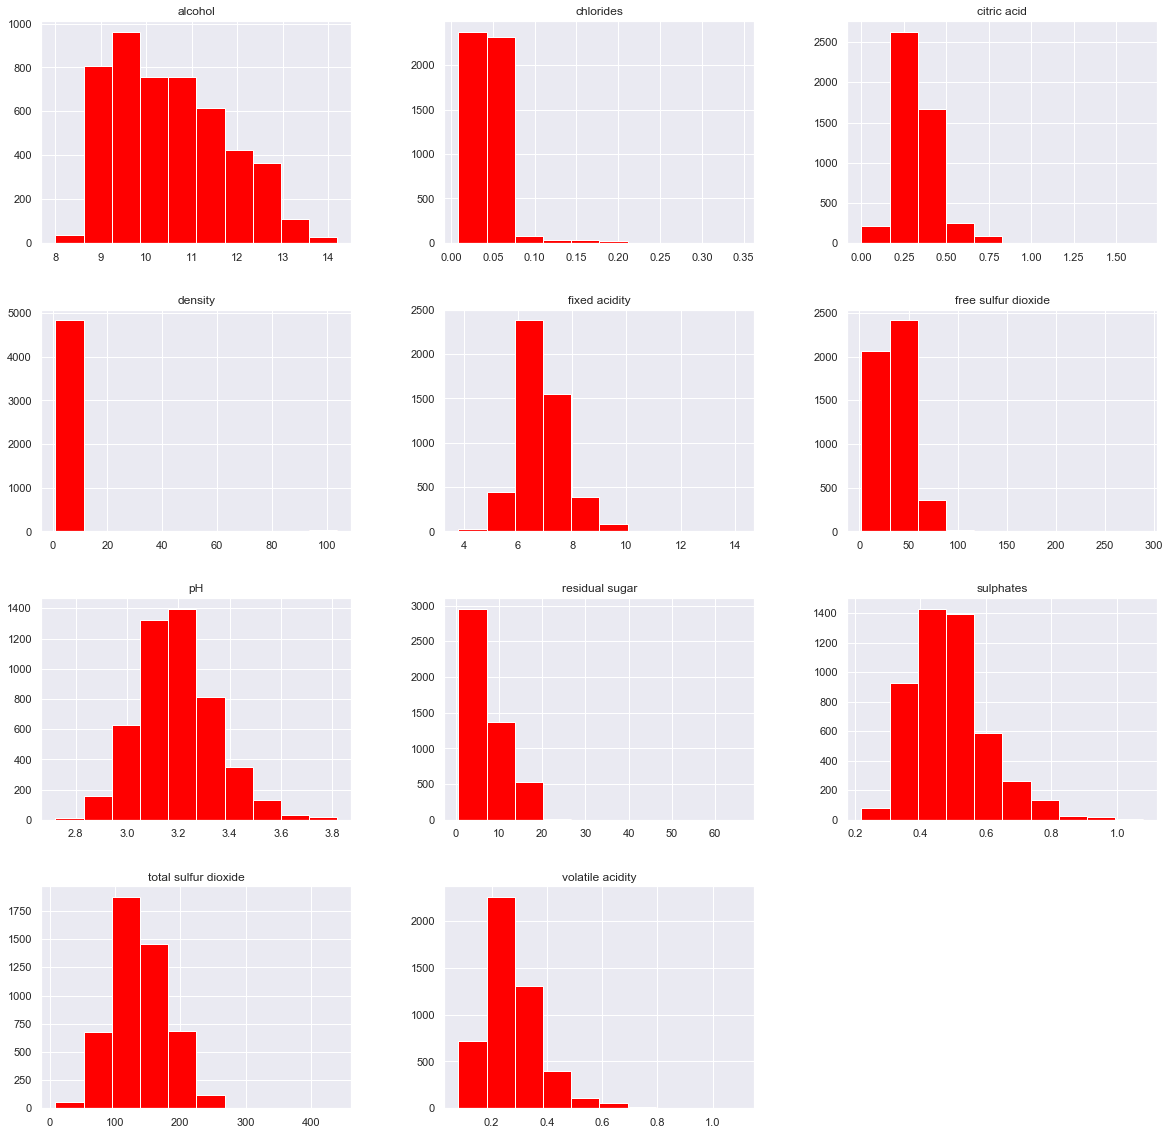

In [46]:
#distribuição dos valores
sns.set()
df_novo_white.iloc[:,:-1].hist(figsize=(20,20), color='red')
plt.show()



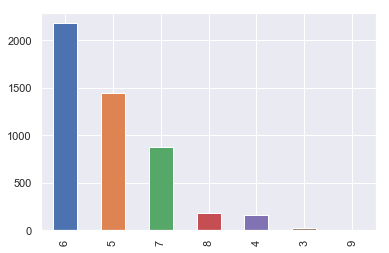

In [47]:

#Estimar qualidade do vinho
#aprendizado supervisionado
#classificação

#contar classes de qualiade existentes
df_novo_white['quality'].value_counts().plot.bar()


In [48]:
correlations = df_novo_white.corr()['quality'].drop(['quality'])
correlations.sort_values(ascending=False)


alcohol                 0.435758
pH                      0.101304
sulphates               0.052717
free sulfur dioxide     0.007932
citric acid            -0.010245
density                -0.025689
residual sugar         -0.099181
fixed acidity          -0.114925
total sulfur dioxide   -0.174003
volatile acidity       -0.195655
chlorides              -0.209434
Name: quality, dtype: float64

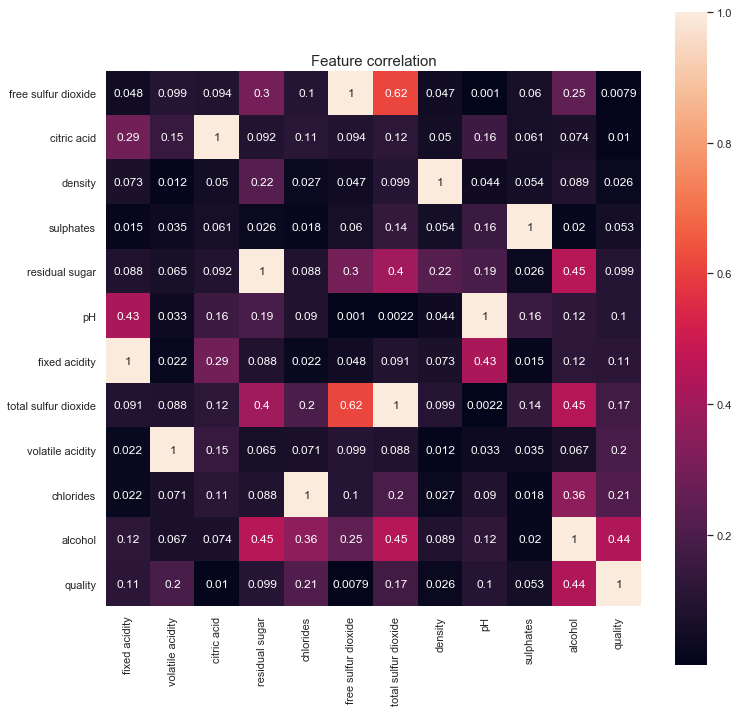

In [49]:
plt.figure(figsize=(12,12))
plt.title('Feature correlation', size=15)
sns.heatmap(df_novo_white.astype(float).corr().abs().sort_values(by="quality"),vmax=1.0, square=True, annot=True)

In [50]:
data = df_novo_white
y = data.quality
X = data.drop('free sulfur dioxide', axis=1)
X = data.drop('citric acid', axis=1)
X = data.drop('density', axis=1)
X = data.drop('sulphates', axis=1)
X = data.drop('residual sugar', axis=1)
X = data.drop('pH', axis=1)
X = data.drop('fixed acidity', axis=1)
X = data.drop('total sulfur dioxide', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

# KNN Classifier

In [51]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7523124357656732


Accuracy: 75.231%
F1 Score:  0.48530628753874683
Precision Score:  0.6086332516801708
Recall Score:  0.460002811926515


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


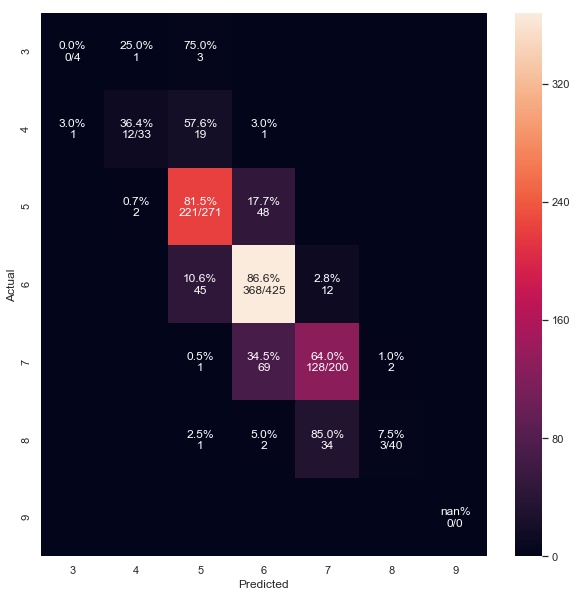

In [52]:
from sklearn import model_selection
test_size = 0.33
seed = 7

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print("Accuracy: %.3f%%" % (result*100.0))
y_pred = model.predict(X_test)
print("F1 Score: ", f1_score(y_test, y_pred, average="macro"))
print("Precision Score: ", precision_score(y_test, y_pred, average="macro"))
print("Recall Score: ", recall_score(y_test, y_pred, average="macro")) 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.show()

cm_analysis(y_test, y_pred, model.classes_, ymap=None, figsize=(10,10))

#  Decision Tree 

In [53]:
X_train_scaled = preprocessing.scale(X_train)
print(X_train_scaled)


from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[ 0.63138283  0.69359105 -0.77549436 ... -0.43277017  0.6549392
  -0.97993815]
 [ 1.10100492 -1.08207302 -0.85832076 ... -0.6987765   0.16663376
   1.28831845]
 [-0.42526688 -0.39153699 -0.77549436 ... -0.87611406 -0.5658244
  -0.97993815]
 ...
 [-1.12970002 -0.19424099 -0.69266796 ... -0.52143895 -0.89136136
  -0.97993815]
 [-0.66007793 -0.19424099 -0.36136236 ... -0.52143895  0.89909192
   0.15419015]
 [-0.30786136  1.08818306 -0.44418876 ... -1.23078916  1.30601312
   0.15419015]]
Accuracy: 0.7523124357656732


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
